<a href="https://colab.research.google.com/github/Farivini/Tecnicas_Graph_mining/blob/main/TECNICAS_GRAPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analises de Grafos 

In [7]:
import networkx as nx
import pandas as pd

temp1 = pd.read_csv('/content/got-s1-edges_semanas7_8 (1).csv')
temp2 = pd.read_csv('/content/got-s8-edges_semanas7_8 (1).csv')

In [9]:
temp1.head()

,Source,Target,Weight
0,NED,ROBERT,192
1,DAENERYS,JORAH,154
2,JON,SAM,121
3,LITTLEFINGER,NED,107
4,NED,VARYS,96


In [10]:
temp2.head()

,Source,Target,Weight
0,DAENERYS,JON,194
1,DAENERYS,TYRION,122
2,JAIME,TYRION,122
3,BRIENNE,JAIME,121
4,JON,TYRION,116


In [14]:
graph_1 = nx.from_pandas_edgelist(temp1, source='Source',target="Target",edge_attr='Weight')
graph_2 = nx.from_pandas_edgelist(temp2, source='Source',target="Target",edge_attr='Weight')


### Visualizando quantidade de vertices e arestas entre as duas temporadas

In [15]:
graph_1.order()

126

In [16]:
graph_2.order()

74

In [17]:
graph_1.size()

549

In [18]:
graph_2.size()

553

## Visualizando a cara dos dois Grafos

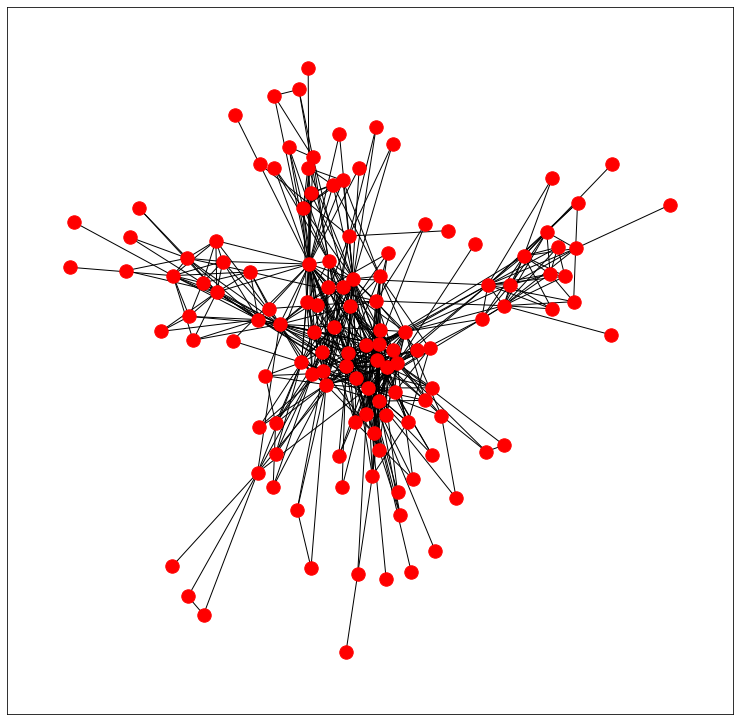

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))

pos1 = nx.spring_layout(graph_1)
pos2 = nx.spring_layout(graph_2)

nx.draw_networkx(graph_1,pos1,with_labels=False,node_size=180,node_color="red")

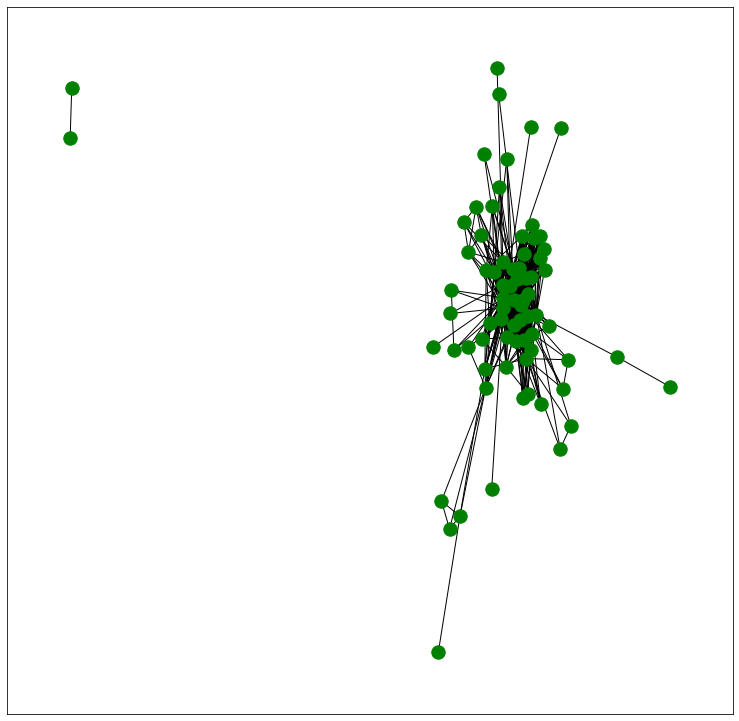

In [28]:
plt.figure(figsize=(13,13))

nx.draw_networkx(graph_2,pos2,with_labels=False,node_size=180,node_color="green")

In [ ]:
!pip install cdlib

### Comparando 3 algoritimos de detecção de comunidades da primeira temporada



*   Girvan
*   Greedy
*   Louvain




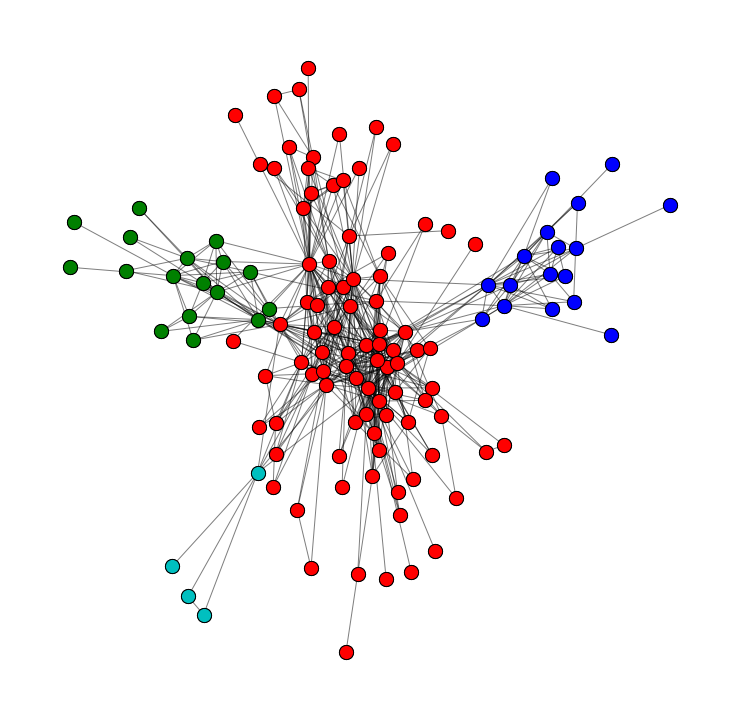

In [33]:
from cdlib import algorithms, viz
dect_comu_1 = algorithms.girvan_newman(graph_1, level=3)
viz.plot_network_clusters(graph_1, dect_comu_1 ,pos1, figsize=(13,13) )

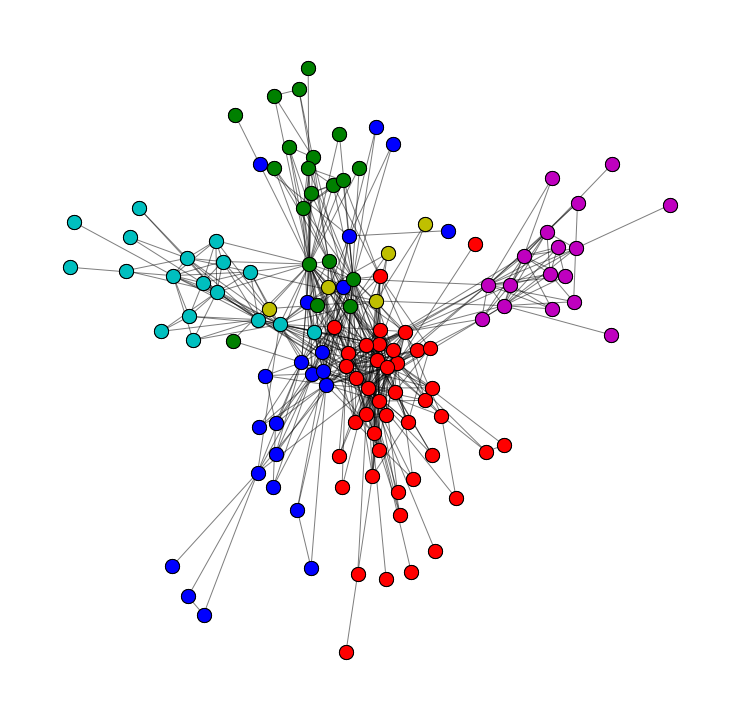

In [34]:
dect_comu_1 = algorithms.louvain(graph_1)
viz.plot_network_clusters(graph_1, dect_comu_1 ,pos1, figsize=(13,13) )

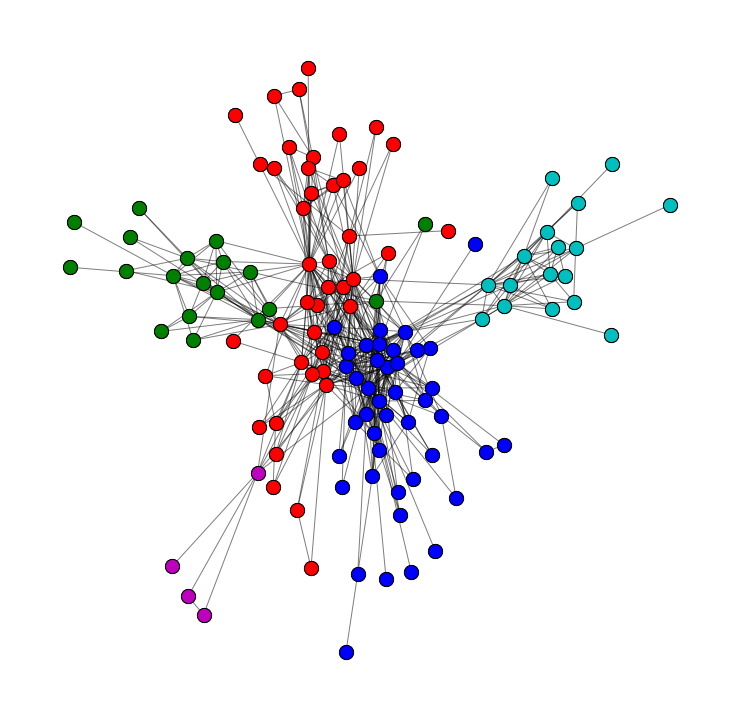

In [39]:
dect_comu_m1 = algorithms.greedy_modularity(graph_1)
viz.plot_network_clusters(graph_1, dect_comu_m1 ,pos1, figsize=(13,13) )

##### É visivel a leitura entre os 3 e suas granularidades

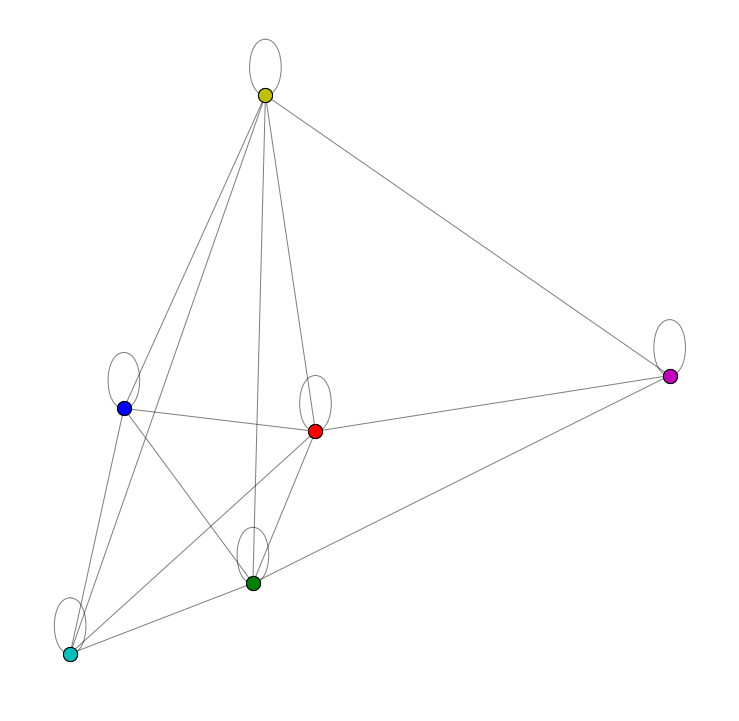

In [38]:
viz.plot_community_graph(graph_1,dect_comu_1,figsize=(13,13))

### Grafo 2 da temporada 8 , consiste em um grafo muito mais centralizado e com pontos que nao se conectam

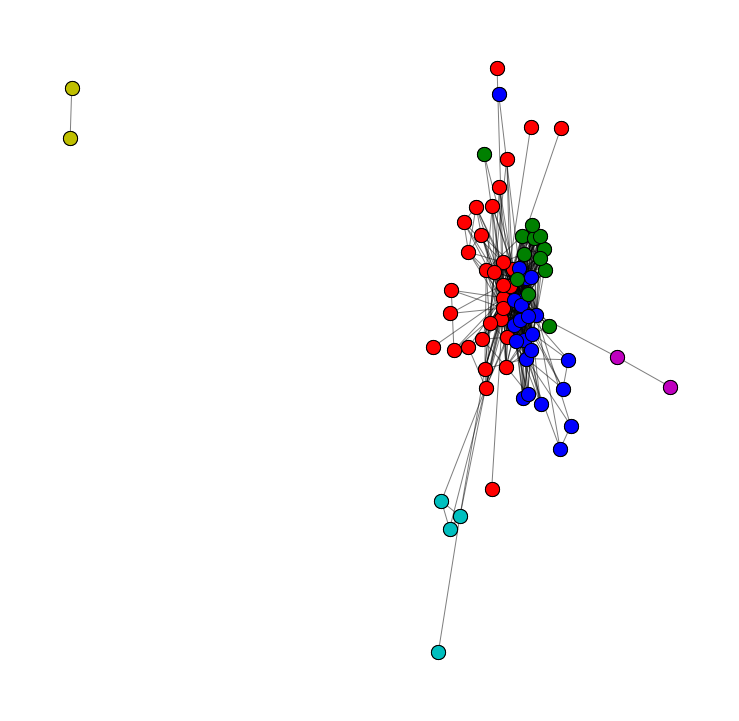

In [42]:
from cdlib import algorithms, viz
dect_comu_2 = algorithms.greedy_modularity(graph_2)
viz.plot_network_clusters(graph_2, dect_comu_2 ,pos2, figsize=(13,13) )

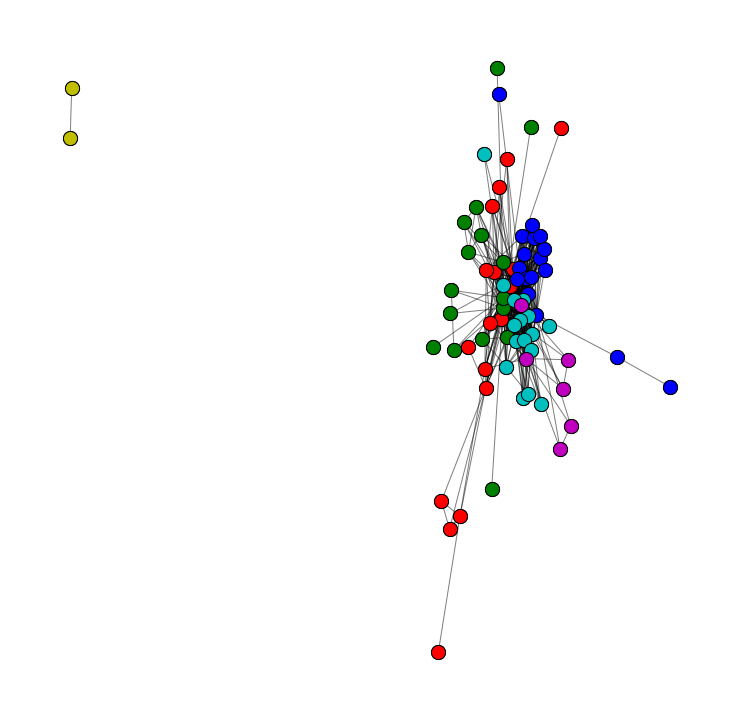

In [43]:
dect_comu_l2 = algorithms.louvain(graph_2)
viz.plot_network_clusters(graph_2, dect_comu_l2 ,pos2, figsize=(13,13) )

In [ ]:
list(graph_1.edges())


In [132]:
list(graph_2.edges())

[('DAENERYS', 'JON'),
 ('DAENERYS', 'TYRION'),
 ('DAENERYS', 'SANSA'),
 ('DAENERYS', 'JORAH'),
 ('DAENERYS', 'VARYS'),
 ('DAENERYS', 'GREY_WORM'),
 ('DAENERYS', 'CERSEI'),
 ('DAENERYS', 'SAM'),
 ('DAENERYS', 'JAIME'),
 ('DAENERYS', 'MISSANDEI'),
 ('DAENERYS', 'ARYA'),
 ('DAENERYS', 'GENDRY'),
 ('DAENERYS', 'DAVOS'),
 ('DAENERYS', 'BRAN'),
 ('DAENERYS', 'TORMUND'),
 ('DAENERYS', 'BRIENNE'),
 ('DAENERYS', 'THEON'),
 ('DAENERYS', 'EURON'),
 ('DAENERYS', 'MAESTER_WOLKAN'),
 ('DAENERYS', 'NIGHT_KING'),
 ('DAENERYS', 'HOUND'),
 ('DAENERYS', 'LYANNA_MORMONT'),
 ('DAENERYS', 'YOHN_ROYCE'),
 ('DAENERYS', 'ALYS'),
 ('DAENERYS', 'BERIC'),
 ('DAENERYS', 'MOUNTAIN'),
 ('DAENERYS', 'PODRICK'),
 ('DAENERYS', 'QHONO'),
 ('DAENERYS', 'QYBURN'),
 ('DAENERYS', 'VISERYS'),
 ('DAENERYS', 'RANDYLL'),
 ('DAENERYS', 'YARA'),
 ('DAENERYS', 'AEGON'),
 ('DAENERYS', 'AERYS'),
 ('DAENERYS', 'BRONN'),
 ('DAENERYS', 'DICKON'),
 ('DAENERYS', 'EDDISON_TOLLETT'),
 ('DAENERYS', 'LYANNA'),
 ('DAENERYS', 'NED_UMBER'),
 ('

#### Pegamos os degree de cada Nome , convertemos em dict e passamos para um data frame

In [138]:
degrau_2 = graph_2.degree()
d_graph_2 = dict(degrau_2)
df_graph_2 = pd.DataFrame(list(d_graph_2.items()),columns=['Nome','Degree'])
df_graph_2.sort_values('Degree',ascending=False)

,Nome,Degree
10,SAM,42
0,DAENERYS,41
2,TYRION,41
6,SANSA,40
8,ARYA,39
...,...,...
66,ALANNA,1
64,AEGON,1
63,MARWYN,1
52,VISERYS,1


In [139]:
import plotly.express as px

fig = px.histogram(df_graph_2, x="Nome", y='Degree')
fig.show()

In [129]:
degrau = graph_1.degree()
d_graph_1 = dict(degrau)
df_graph = pd.DataFrame(list(d_graph_1.items()), columns = ['Nome','Degree'])
df_graph.sort_values('Degree',ascending=False)


,Nome,Degree
0,NED,57
13,TYRION,41
1,ROBERT,36
10,CATELYN,36
11,ROBB,30
...,...,...
92,RYGER_RIVERS,1
110,IROGENIA,1
94,WAYMAR_ROYCE,1
105,MYRCELLA,1


In [126]:
import plotly.express as px

fig = px.histogram(df_graph, x="Nome", y='Degree')
fig.show()


### Com Poucas linhas de codigo verificamos a diferença entre uma temporada e outra no top 3 

## Verificando o maior grau de centralidade

In [112]:
grau = nx.degree_centrality(graph_1)
print(f'{max(grau)} : {max(grau.values())}')


YOREN : 0.456


In [113]:
grau_intermed = nx.betweenness_centrality(graph_1)
print(f'{max(grau_intermed)} : {max(grau_intermed.values())}')

YOREN : 0.3032802081478768


In [114]:
grau_proxima = nx.closeness_centrality(graph_1)
print(f'{max(grau_proxima)} : {max(grau_proxima.values())}')

YOREN : 0.628140703517588


### Verificando o Grafo 2

In [140]:
grau_proxima_2 = nx.closeness_centrality(graph_2)
print(f'{max(grau_proxima_2)} : {max(grau_proxima_2.values())}')

YOHN_ROYCE : 0.6770077894171367


In [141]:
grau_intermed_2 = nx.betweenness_centrality(graph_2)
print(f'{max(grau_intermed_2)} : {max(grau_intermed_2.values())}')

YOHN_ROYCE : 0.13390159981644


In [142]:
grau_2 = nx.degree_centrality(graph_2)
print(f'{max(grau_2)} : {max(grau_2.values())}')


YOHN_ROYCE : 0.5753424657534246


### Plotando Grafo por função de centralidade

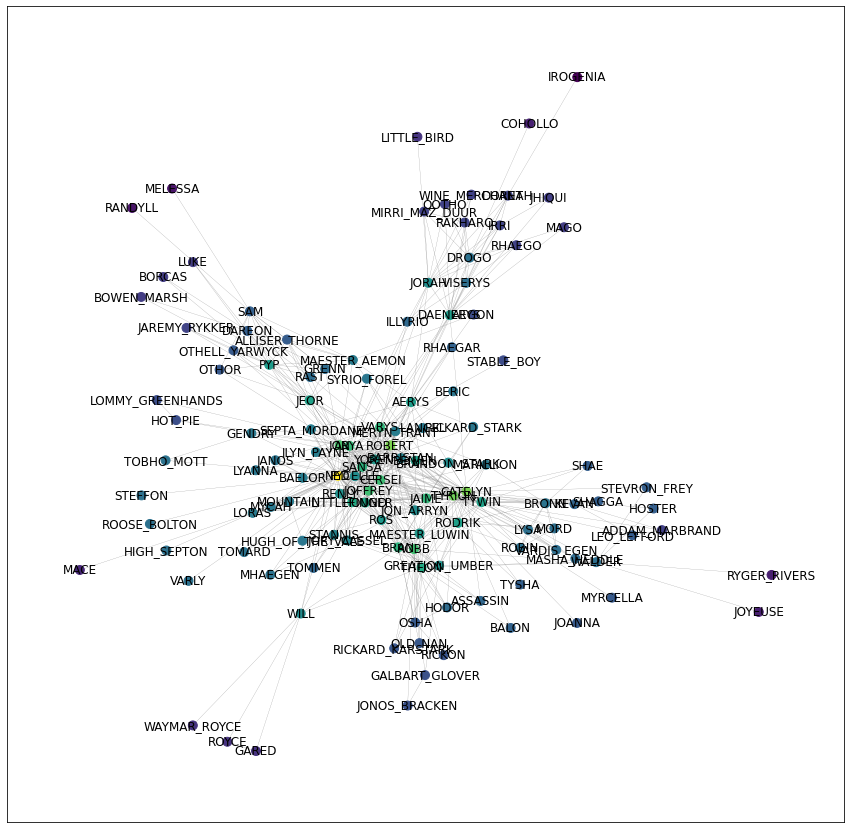

In [108]:
proxima = nx.closeness_centrality(graph_1)
proxima = list(proxima.values())
centralid = nx.spring_layout(graph_1,seed=33)
plt.figure(figsize=(15,15))
nx.draw_networkx(graph_1,centralid,with_labels =True, node_size=80,node_color=proxima,edge_color='Gray',width=0.2,font_color='black')

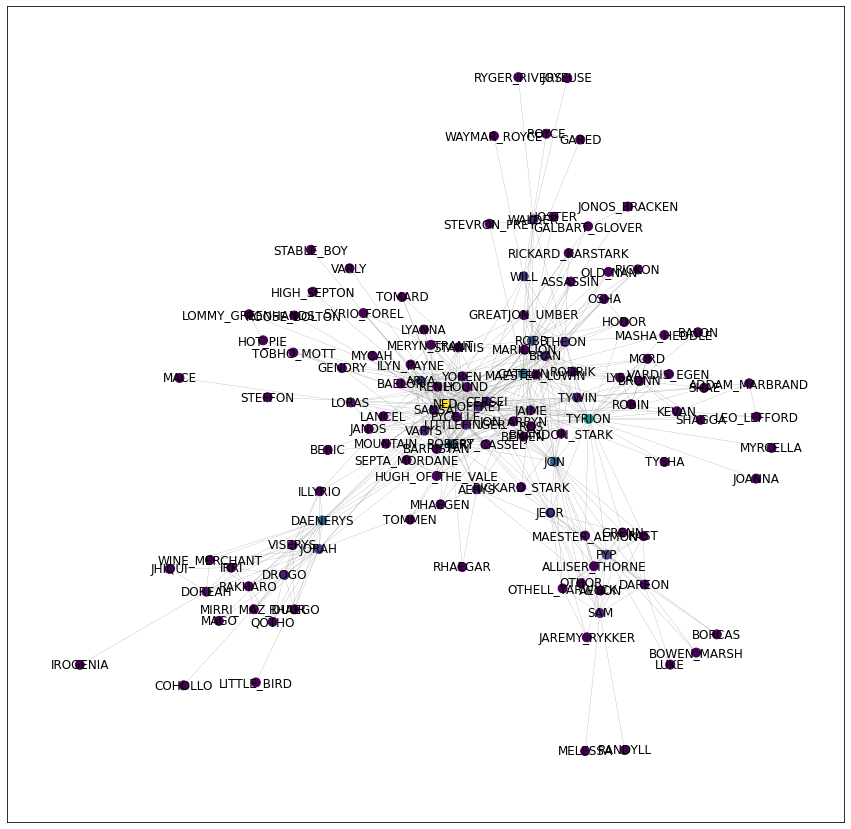

In [81]:
intermed = nx.betweenness_centrality(graph_1)
intermed = list(intermed.values())
centralid = nx.spring_layout(graph_1,seed=10000)
plt.figure(figsize=(15,15))
nx.draw_networkx(graph_1,centralid,with_labels =True, node_size=80,node_color=intermed,edge_color='Gray',width=0.2,font_color='black')